In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as sl
from numpy import nan,inf
import scipy.constants as sc
import matplotlib as mpl
import glob
from astropy.time import Time
np.set_printoptions(precision=10)
import matplotlib
plt.rc('font',**{'family':'serif','serif':['Times']})
mpl.rcParams['font.size'] = 13
#mpl.rcParams['font.family'] = 'serif'
#mpl.rcParams['font.sans-serif'] = ['DejaVu Sans']
mpl.rcParams['axes.linewidth'] = 1
mpl.rcParams['lines.linewidth'] = 2.5
mpl.rcParams['patch.linewidth'] = 1

# Changing this will affect the size of the plot in Jupyter notebook as well as resolution of the final PDF. Can change later
plt.rcParams['figure.dpi'] = 100

#mpl.rcParams['mathtext.fontset'] = 'custom'
#mpl.rcParams['mathtext.rm'] = 'Serif'
#mpl.rcParams['mathtext.it'] = 'Serif:italic'
#mpl.rcParams['mathtext.bf'] = 'Serif:bold'

# tick parameters:
mpl.rcParams['xtick.top'] = True
mpl.rcParams['ytick.right'] = True


mpl.rcParams['xtick.minor.visible'] = True
mpl.rcParams['ytick.minor.visible'] = True
mpl.rcParams['ytick.direction'] = 'in'
mpl.rcParams['xtick.direction'] = 'in'
    
mpl.rcParams['xtick.major.size'] = 6  # default 3.5
mpl.rcParams['ytick.major.size'] = 6  # default 3.5
mpl.rcParams['xtick.minor.size'] =  3  # default 2 
mpl.rcParams['ytick.minor.size'] = 3  # default 2 
    
mpl.rcParams['xtick.major.width'] = 1  # default 0.8
mpl.rcParams['ytick.major.width'] = 1  # default 0.8
mpl.rcParams['xtick.minor.width'] =1  # default 0.6
mpl.rcParams['ytick.minor.width'] = 1  # default 0.6
mpl.rcParams['text.usetex'] = True


MASS_TO_FREQ = sc.eV / sc.h
def plot_timescales( ax,ymin,ymax,annotate=True):

    l10ma_T = np.log10( 1/(1.0*sc.day*1 * MASS_TO_FREQ) )
    ax.plot([l10ma_T,l10ma_T],[ymin,ymax],'gray',ls=":")
    if annotate==True:
        ax.annotate(r"1 day",xy = [l10ma_T,ymax],va = "top",rotation=-90,color="dimgray")
    
    # l10ma_T = np.log10( 1/(1.0*sc.day*14 * MASS_TO_FREQ) )
    # ax.plot([l10ma_T,l10ma_T],[ymin,ymax],'gray',ls="-")
    # if annotate==True:
    #     ax.annotate(r"2 weeks",xy = [l10ma_T,ymax],va = "top",rotation=-90,color="dimgray")

    l10ma_T = np.log10( 1/(1.0*sc.year * MASS_TO_FREQ) )
    ax.plot([l10ma_T,l10ma_T],[ymin,ymax],'gray',ls=":")
    if annotate==True:
        ax.annotate(r"1 year",xy = [l10ma_T,ymax],va = "top",rotation=-90,color="dimgray")

    l10ma_T = np.log10( 1/(11.0*sc.year * MASS_TO_FREQ) )
    ax.plot([l10ma_T ,l10ma_T ],[ymin,ymax],'gray',ls=":")
    if annotate==True:
        ax.annotate(r"Solar Cycle",xy = [l10ma_T ,ymax],va = "top",rotation=-90,color="dimgray")

    l10ma_T = np.log10( 1/(18.0*sc.year * MASS_TO_FREQ) )
    ax.plot([l10ma_T,l10ma_T],[ymin,ymax],'gray',ls="-")
    if annotate==True:
        ax.annotate(r"T$_{\rm obs}$",xy = [l10ma_T,ymax],va = "top",rotation=-90,color="dimgray")


#rho = 7.68351e-6 * 0.40 #0.46
rho = (0.4 * 1e9 * 100**3) * sc.c**3  * sc.hbar**3 / sc.eV**3
l10S_to_l10ga = lambda l10S,l10ma: l10S+9+l10ma-np.log10(rho)/2


def make_ul_plot(ax,l10ma , ul_auto,ul_full ):
    #fig , ax = plt.subplots(figsize=(5,4))
    #ax.set_title("95% UL (Bayesian approach)")
    #ax.fill_between(np.log10(PPTA_QUIJOTE[:,0]),np.log10(PPTA_QUIJOTE[:,1]),np.zeros(len(PPTA_QUIJOTE)),alpha=0.5,fc='darkgreen',label="PPTA-QUIJOTE")


    _l10ma = np.linspace(-24,-18.5,101)
    #Chandra
    ax.plot(_l10ma,np.log10(5e-13)*np.ones(len(_l10ma)),color="black",ls='--')
    ax.annotate("Chandra\n H1821+643",xy=(-18.5-0.05,np.log10(5e-13)-0.1),size=12,va="top",ha="right")

    #Planck
    ax.plot(_l10ma,_l10ma+9,color="black",ls=':',lw=2)
    ax.annotate("Planck",xy=(-19.3,-10.5),size=14,va="top",ha="right",rotation="25")


    try:
        ax.plot(l10ma ,l10S_to_l10ga(ul_full,l10ma),'.',color='blue')
        ax.plot(l10ma ,l10S_to_l10ga(ul_full,l10ma),'-',color='blue',label="Full-corr")
    except:
        pass


    try:
        ax.plot(l10ma ,l10S_to_l10ga(ul_auto,l10ma),'.',color='red')
        ax.plot(l10ma ,l10S_to_l10ga(ul_auto,l10ma),'-',color='red',label="Auto-corr")
    except:
        pass



    ax.set_xlim(-23.5,-18.5)
    ymin = -16
    ymax = -6
    ax.set_ylim(ymin,ymax)
    #plt.title(r"the 95% upper limit on $\log_{\rm 10}g_{a\gamma\gamma}/{\rm GeV}^{-1}$"+
    #          "\n assuming local DM density " + r"$0.40 {\rm GeV}/{\rm cm}^3$")

    ax.legend(loc=4,prop={'size': 10})

    plot_timescales( ax,ymin,ymax,annotate=True)


    #ax.plot(mock[:,0] , l10S_to_l10ga(mock[:,2],mock[:,0]),'red' )

    #plot_timescales(ax,ymin,ymax)

    ax.set_xlabel(r"$\log_{\rm 10}m_a /{\rm eV}$")
    ax.set_ylabel(r"$\log_{\rm 10}g_{a\gamma\gamma}/{\rm GeV}^{-1}$")
    ax.grid(axis="y")


def make_bf_plot(ax,l10ma,lbf_af,lbf_nf):

    #fig , ax = plt.subplots(figsize=(5,3))
    ymin = -5
    ymax = 20
    plot_timescales( ax,ymin,ymax,annotate=False)

    try:
        ax.plot(l10ma,lbf_nf,'-',color='b',label="Full vs None")
        ax.plot(l10ma,lbf_nf,'.',color='b')
    except:
        pass

    try:
        ax.plot(l10ma,lbf_af,'-',color='r',label="Full vs Auto")
        ax.plot(l10ma,lbf_af,'.',color='r')
    except:
        pass
    
    
    ax.set_ylim(ymin,ymax)
    ax.set_xlim(-23.5,-18.5)
    ax.plot([-23.5,-18.5],[0,0],lw=2,color="black")


    ax.set_xlabel(r"$\log_{\rm 10}m_a /{\rm eV}$")
    #ax.set_ylabel(r"$\ln $BF$^{\rm full}_{\rm auto}$")
    ax.set_ylabel(r"$\ln $BF")
    ax.grid(axis="y")
    ax.legend(loc=4,prop={'size': 10})

## Data IONFR

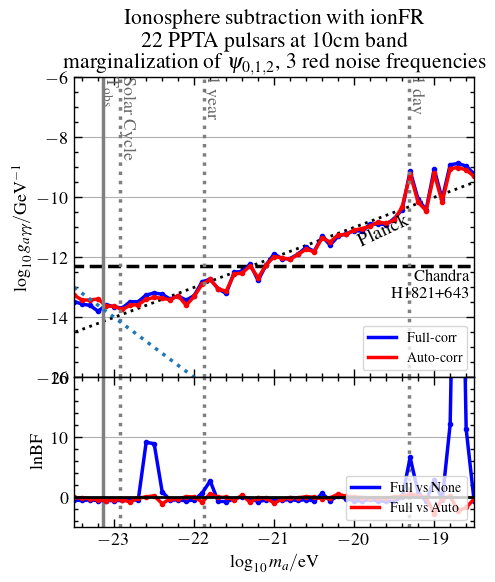

In [2]:
# True
fig,axes = plt.subplots(2,1,figsize=(5,6),sharex=True,gridspec_kw={'height_ratios': [4, 2]})
lbf_nf = None; lbf_af = None; ul_auto= None; ul_full=None;
plt.subplots_adjust(left=0.15,
                    bottom=0.10, 
                    right=0.95, 
                    top=0.85, 
                    wspace=0.0, 
                    hspace=0.0)


l10ma = np.arange(0,51)*0.1 -23.5
ul_auto = np.array([-1.517, -1.781, -1.877, -1.943, -2.282, -2.387, -2.594, -2.555,
       -2.632, -2.558, -2.59 , -2.721, -2.869, -2.834, -3.254, -3.061,
       -2.75 , -2.694, -3.101, -3.289, -2.813, -2.877, -2.745, -3.239,
       -2.907, -2.73 , -2.872, -3.023, -2.956, -2.886, -3.072, -2.702,
       -2.948, -2.805, -2.894, -2.846, -2.897, -2.916, -2.88 , -3.024,
       -3.016, -2.671, -1.686, -2.721, -3.1  , -1.959, -3.012, -1.997,
       -2.062, -2.24 , -2.561])


ul_full = np.array([-1.73 , -1.912, -2.06 , -2.356, -2.235, -2.404, -2.547, -2.436,
       -2.535, -2.412, -2.445, -2.586, -2.85 , -2.844, -3.086, -3.029,
       -2.672, -2.683, -3.105, -3.359, -2.755, -2.825, -2.69 , -3.326,
       -2.906, -2.641, -2.905, -2.997, -2.947, -2.82 , -3.055, -2.658,
       -3.05 , -2.846, -2.872, -2.864, -2.981, -2.849, -2.945, -3.064,
       -2.965, -2.766, -1.582, -2.626, -3.075, -1.814, -2.915, -1.871,
       -1.927, -2.114, -2.48 ])


make_ul_plot(axes[0],l10ma,ul_auto,ul_full)
axes[0].set_title("Ionosphere subtraction with ionFR\n 22 PPTA pulsars at 10cm band\n"+r"marginalization of $\psi_{0,1,2}$, 3 red noise frequencies")
axes[0].plot(l10ma , -13-2*(l10ma+23.5),':')
 

lbf_af = np.array([-0.015, -0.144, -0.209, -0.375, -0.531, -0.382, -0.379, -0.782,
       -0.129,  0.08 ,  0.255, -1.053, -0.244, -0.307,  0.115,  0.072,
       -0.78 ,  0.591,  0.013,  0.016, -0.427,  0.338, -0.828, -0.029,
       -0.169, -0.948, -0.299, -0.03 , -0.075,  0.126,  0.005, -0.212,
       -0.075,  0.527,  0.174,  0.071, -0.034, -0.055, -0.05 , -0.135,
        0.078,  0.207,  0.53 ,  0.237, -0.018, -2.744, -0.2  ,  0.173,
       -2.254, -1.689, -0.275])


lbf_nf = np.array([-4.779e-01, -5.041e-01, -4.245e-01, -5.306e-01, -5.252e-01,
       -5.484e-01, -5.083e-01, -3.228e-01, -5.178e-01,        inf,
              inf,  9.360e-01, -4.495e-01, -4.221e-01, -5.796e-01,
       -4.400e-01,  7.165e-01,  2.729e+00, -6.618e-01, -6.957e-01,
       -2.708e-01,  1.155e-01, -1.972e-01, -7.170e-01, -4.325e-01,
       -1.932e-01, -4.528e-01, -3.861e-01, -5.209e-01, -3.674e-01,
       -6.014e-01,  6.435e-01, -5.572e-01,  2.327e-01, -2.214e-01,
       -5.726e-01, -5.753e-01, -3.535e-01, -5.853e-01, -6.655e-01,
       -6.077e-01,  5.128e-04,        inf,  7.524e-01, -6.186e-01,
              inf, -5.211e-01,        inf,        inf,        inf,
       -6.578e-01])

lbf_nf[45] = np.log(0.9332)+3
lbf_nf[9]  = np.log(1.1988)+9
lbf_nf[10] = np.log(0.9382)+9
lbf_nf[42] = np.log(1.9054)+6
lbf_nf[47] = np.log(1.1888)+12
lbf_nf[48] = np.log(0.4736)+85
lbf_nf[49] = np.log(0.5387)+12
make_bf_plot(axes[1],l10ma,lbf_af ,lbf_nf)
#plt.savefig("Figures/ul_bf_iono_10.pdf")
#plt.savefig("Figures/ul_bf_iono_10.jpg")


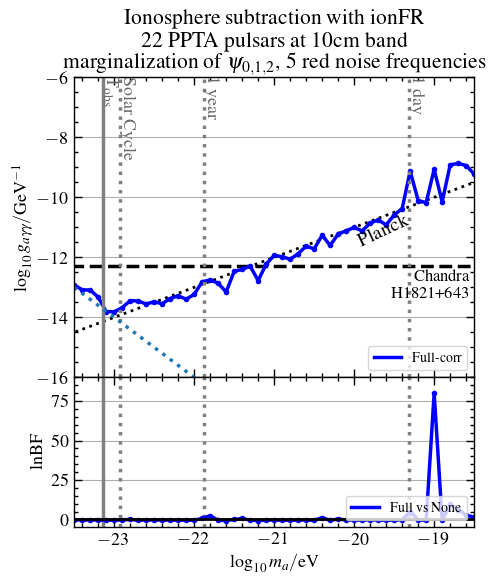

In [5]:
# True
fig,axes = plt.subplots(2,1,figsize=(5,6),sharex=True,gridspec_kw={'height_ratios': [4, 2]})
lbf_nf = None; lbf_af = None; ul_auto= None; ul_full=None;
plt.subplots_adjust(left=0.15,
                    bottom=0.10, 
                    right=0.95, 
                    top=0.85, 
                    wspace=0.0, 
                    hspace=0.0)


l10ma = np.arange(0,51)*0.1 -23.5


ul_full = np.array([-1.173, -1.44 , -1.546, -1.881, -2.463, -2.574, -2.534, -2.4  ,
       -2.51 , -2.711, -2.734, -2.904, -2.829, -2.836, -3.052, -2.993,
       -2.669, -2.709, -2.923, -3.309, -2.724, -2.759, -2.75 , -3.329,
       -2.883, -2.692, -2.833, -3.02 , -2.935, -2.784, -2.972, -2.624,
       -3.059, -2.779, -2.77 , -2.761, -2.973, -2.813, -2.809, -3.073,
       -2.844, -2.733, -1.581, -2.662, -2.832, -1.82 , -3.011, -1.873,
       -1.924, -2.097, -2.483])


make_ul_plot(axes[0],l10ma,ul_auto,ul_full)
axes[0].set_title("Ionosphere subtraction with ionFR\n 22 PPTA pulsars at 10cm band\n"+r"marginalization of $\psi_{0,1,2}$, 5 red noise frequencies")
axes[0].plot(l10ma , -13-2*(l10ma+23.5),':')



lbf_nf = np.array([-3.140e-01, -3.325e-01, -3.836e-01, -3.329e-01, -4.834e-01,
       -4.386e-01, -3.354e-01,  4.854e-02, -5.290e-01, -3.345e-01,
       -4.057e-01, -3.457e-01, -4.398e-01, -4.430e-01, -5.215e-01,
       -4.732e-01,  6.391e-01,  2.392e+00, -5.328e-01, -6.946e-01,
        1.070e-03,  6.195e-01, -4.521e-01, -7.159e-01, -4.731e-01,
       -3.195e-01, -4.844e-01, -5.084e-01, -4.737e-01, -3.164e-01,
       -5.816e-01,  1.161e+00, -5.982e-01,  3.067e-01, -3.458e-01,
       -3.847e-01, -5.150e-01, -2.247e-01, -4.775e-01, -5.862e-01,
       -4.940e-01, -1.633e-01,  4.956e+00, -2.036e-01, -6.484e-01,
              80, -5.799e-01,  9.610e+00,  6.291e+00,  2.749e+00,
        1.396e+00])


make_bf_plot(axes[1],l10ma,lbf_af ,lbf_nf)
#plt.savefig("Figures/ul_bf_iono_10.pdf")
#plt.savefig("Figures/ul_bf_iono_10.jpg")


# Data NO_IONO

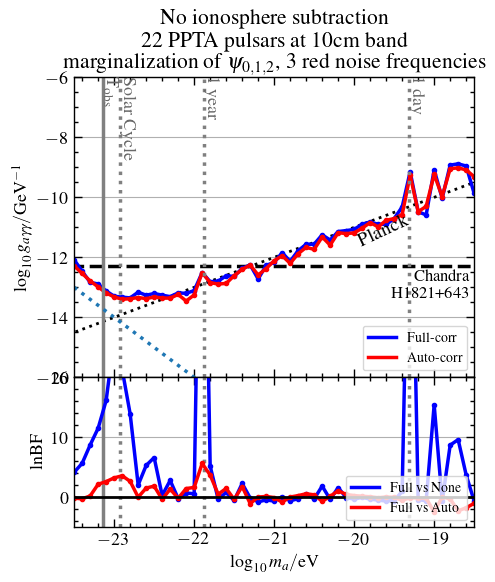

In [22]:
# True
fig,axes = plt.subplots(2,1,figsize=(5,6),sharex=True,gridspec_kw={'height_ratios': [4, 2]})
lbf_nf = None; lbf_af = None; ul_auto= None; ul_full=None;
plt.subplots_adjust(left=0.15,
                    bottom=0.10, 
                    right=0.95, 
                    top=0.85, 
                    wspace=0.0, 
                    hspace=0.0)


l10ma = np.arange(0,51)*0.1 -23.5
ul_auto = np.array([-0.54 , -0.892, -1.243, -1.542, -1.845, -2.075, -2.253, -2.335,
       -2.395, -2.532, -2.577, -2.71 , -2.816, -2.793, -3.113, -3.008,
       -2.365, -2.799, -2.946, -3.025, -2.866, -2.759, -2.711, -3.145,
       -3.03 , -2.87 , -2.803, -3.156, -2.935, -2.823, -2.99 , -2.678,
       -3.048, -2.734, -2.864, -2.941, -2.884, -2.796, -3.041, -2.922,
       -2.963, -2.929, -1.718, -3.034, -2.957, -1.991, -2.829, -2.   ,
       -2.072, -2.242, -2.569])


ul_full = np.array([-0.337, -0.82 , -1.289, -1.444, -1.778, -2.052, -2.182, -2.308,
       -2.217, -2.419, -2.461, -2.616, -2.766, -2.742, -2.856, -2.863,
       -2.363, -2.768, -2.849, -2.771, -2.89 , -2.725, -2.706, -3.279,
       -2.923, -2.924, -2.7  , -3.089, -2.832, -2.723, -2.817, -2.605,
       -2.879, -2.695, -2.765, -2.824, -2.753, -2.776, -2.954, -3.056,
       -2.963, -2.676, -1.601, -3.036, -3.242, -1.837, -2.89 , -1.881,
       -1.939, -2.112, -3.127])


make_ul_plot(axes[0],l10ma,ul_auto,ul_full)
axes[0].set_title("No ionosphere subtraction\n 22 PPTA pulsars at 10cm band\n"+r"marginalization of $\psi_{0,1,2}$, 3 red noise frequencies")
axes[0].plot(l10ma , -13-2*(l10ma+23.5),':')
 

lbf_af = np.array([-1.332e-01,        inf,        inf,        inf,        inf,
              inf,        inf,        inf,  3.048e-02,  1.548e+00,
        1.876e+00, -3.336e-01,  1.375e+00, -1.561e-01,  1.470e+00,
        1.653e+00,  5.647e+00,  3.719e+00,  5.187e-01,  1.485e+00,
       -3.405e-01,  1.808e+00, -1.040e+00,  5.016e-02,  1.536e-01,
       -3.583e-02, -7.971e-01,  5.447e-02,  2.909e-01,  6.044e-01,
        4.175e-01, -6.561e-01,  1.577e-01,  1.108e+00,  4.871e-01,
        2.971e-01,  1.864e-01,  1.015e-01, -5.921e-02,  6.891e-02,
       -1.866e-03, -4.865e-01, -6.941e-02, -1.089e-01, -1.335e-01,
       -2.462e+00,  5.523e-02, -2.550e-01, -2.240e+00, -1.737e+00,
       -1.000e+00])
lbf_af[1:8] = np.array([-0.245,  0.235, 2.187,  2.629,  3.246,  3.599,  2.667])



lbf_nf = np.array([   inf,    inf,    inf,    inf,    inf,    inf,    inf,    inf,
        2.064,    inf,    inf,  0.316,  2.817, -0.2  ,  0.718,  0.599,
          inf,  5.217, -0.282,  0.814, -0.523,  2.317, -0.103, -0.743,
       -0.43 , -0.624,  0.109, -0.572, -0.232,  0.531, -0.256,  1.88 ,
       -0.336,  1.62 , -0.033, -0.297, -0.007, -0.297, -0.462, -0.619,
       -0.532,  0.994,    inf, -0.385, -0.559,    inf, -0.648,    inf,
          inf,    inf,    inf])
# lbf_nf[42] = np.log(4.3760) + 3
lbf_nf[0]  = np.log(0.4391) + 5
lbf_nf[1]  = np.log(1.9670) + 5
lbf_nf[2]  = np.log(5.6641) + 7
lbf_nf[3]  = np.log(4.6288) + 10
lbf_nf[4]  = np.log(0.0213) + 20
lbf_nf[5]  = np.log(4.5405) + 25
lbf_nf[6]  = np.log(0.0251) + 25

lbf_nf[7]  = np.log(0.3341) + 15
lbf_nf[9]  = np.log(1.3770) + 5
lbf_nf[10] = np.log(5.1074) + 5
lbf_nf[16] = np.log(1.3333) + 80

lbf_nf[42] = np.log(2.1076) + 65
lbf_nf[45] = np.log(1.5536) + 15
lbf_nf[47] = np.log(5.4874) + 7
lbf_nf[48] = np.log(1.8646) + 9
lbf_nf[49] = np.log(0.2828) + 5
lbf_nf[50] = np.log(0.5330)


make_bf_plot(axes[1],l10ma,lbf_af ,lbf_nf )
#plt.savefig("Figures/ul_bf_iono_10.pdf")
#plt.savefig("Figures/ul_bf_iono_10.jpg")


# Mock Data

## -23.0

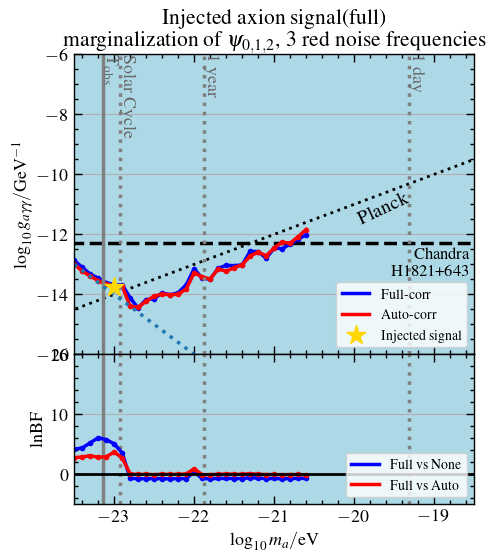

In [23]:
# True
fig,axes = plt.subplots(2,1,figsize=(5,6),sharex=True,gridspec_kw={'height_ratios': [4, 2]})
lbf_nf = None; lbf_af = None; ul_auto= None; ul_full=None;
plt.subplots_adjust(left=0.15,
                    bottom=0.10, 
                    right=0.95, 
                    top=0.85, 
                    wspace=0.0, 
                    hspace=0.0)


l10ma = np.arange(0,30)*0.1 -23.5


ul_auto = np.array([-1.247, -1.576, -1.848, -2.099, -2.317, -2.467, -2.579, -3.358,
       -3.486, -3.386, -3.314, -3.348, -3.469, -3.552, -3.479, -3.034,
       -3.275, -3.445, -3.204, -3.389, -3.362, -3.374, -3.175, -3.15 ,
       -3.369, -3.212, -3.118, -3.251, -3.133, -2.995])

ul_full = np.array([-1.125, -1.454, -1.781, -2.016, -2.264, -2.437, -2.537, -3.074,
       -3.514, -3.33 , -3.401, -3.31 , -3.471, -3.502, -3.344, -2.899,
       -3.325, -3.448, -3.191, -3.189, -3.3  , -3.375, -3.023, -3.131,
       -3.451, -3.214, -3.333, -3.285, -3.207, -3.178])


axes[0].scatter(-23,l10S_to_l10ga(-2.5,-23),s=200,marker="*",color="gold",zorder=4,alpha=1,label="Injected signal")
axes[0].set_facecolor('lightblue')
make_ul_plot(axes[0],l10ma,ul_auto,ul_full)
axes[0].set_title("Injected axion signal(full)\n"+r"marginalization of $\psi_{0,1,2}$, 3 red noise frequencies")
axes[0].plot(l10ma , -13-2*(l10ma+23.5),':')
 

lbf_af = np.array([ 2.785e+00,  2.895e+00,  3.115e+00,  2.838e+00,  2.929e+00,
        3.715e+00,  2.742e+00,  8.263e-02, -1.916e-02,  1.790e-02,
       -5.611e-02,  3.892e-02, -1.718e-02,  1.482e-02,  5.375e-02,
        9.312e-01, -5.362e-02, -3.660e-02,  2.021e-03,  5.851e-02,
        2.321e-02,  3.748e-03,  1.222e-01,  5.138e-03, -2.961e-02,
       -2.337e-02, -6.189e-02, -2.931e-02, -1.942e-02, -8.267e-02])


lbf_nf = np.array([ 4.182,  4.402,  5.248,  6.101,  5.784,  5.093,  3.566, -0.644,
       -0.749, -0.722, -0.725, -0.709, -0.768, -0.704, -0.718,  0.426,
       -0.688, -0.752, -0.669, -0.687, -0.692, -0.717, -0.555, -0.64 ,
       -0.709, -0.687, -0.751, -0.704, -0.669, -0.675])


axes[1].set_facecolor('lightblue')
make_bf_plot(axes[1],l10ma,lbf_af,lbf_nf)
#plt.savefig("Figures/ul_bf_iono_10.pdf")
plt.savefig("Figures/mock1.jpg")


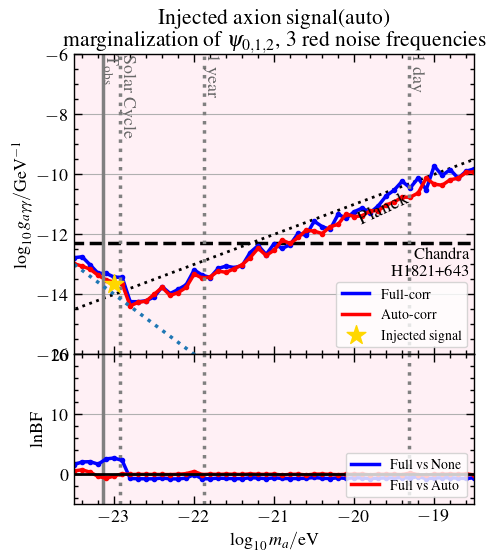

In [26]:
# True
fig,axes = plt.subplots(2,1,figsize=(5,6),sharex=True,gridspec_kw={'height_ratios': [4, 2]})
lbf_nf = None; lbf_af = None; ul_auto= None; ul_full=None;
plt.subplots_adjust(left=0.15,
                    bottom=0.10, 
                    right=0.95, 
                    top=0.85, 
                    wspace=0.0, 
                    hspace=0.0)


l10ma = np.arange(0,51)*0.1 -23.5


ul_auto = np.array([-1.236, -1.415, -1.618, -1.922, -2.176, -2.351, -2.508, -3.339,
       -3.324, -3.382, -3.255, -3.126, -3.492, -3.499, -3.426, -3.08 ,
       -3.314, -3.379, -3.278, -3.424, -3.401, -3.369, -3.231, -3.022,
       -3.361, -3.283, -3.051, -3.261, -3.159, -3.021, -3.149, -3.329,
       -3.203, -3.22 , -2.977, -3.162, -3.24 , -3.172, -3.267, -3.177,
       -3.176, -3.118, -3.219, -3.177, -2.785, -3.083, -3.219, -3.136,
       -3.186, -3.094, -3.171])

ul_full = np.array([-1.034, -1.104, -1.475, -1.857, -1.957, -2.183, -2.288, -3.2  ,
       -3.301, -3.37 , -3.343, -3.103, -3.428, -3.394, -3.337, -2.942,
       -3.215, -3.395, -3.192, -3.213, -3.363, -3.4  , -3.062, -2.929,
       -3.328, -3.066, -3.326, -3.3  , -3.02 , -3.19 , -2.818, -3.098,
       -3.29 , -2.886, -3.125, -3.002, -2.983, -3.233, -3.11 , -2.875,
       -2.781, -2.586, -2.911, -2.679, -3.171, -2.475, -2.893, -2.798,
       -3.184, -3.051, -3.074])


axes[0].scatter(-23,l10S_to_l10ga(-2.4,-23),s=200,marker="*",color="gold",zorder=4,alpha=1,label="Injected signal")
axes[0].set_facecolor('lavenderblush')
make_ul_plot(axes[0],l10ma,ul_auto,ul_full)
axes[0].set_title("Injected axion signal(auto)\n"+r"marginalization of $\psi_{0,1,2}$, 3 red noise frequencies")
axes[0].plot(l10ma , -13-2*(l10ma+23.5),':')
 

lbf_af = np.array([ 0.567,  0.764,  0.349, -0.335, -0.658, -0.274,  0.087, -0.024,
       -0.006, -0.003, -0.013, -0.021, -0.038,  0.012,  0.118,  0.474,
       -0.034,  0.034, -0.01 ,  0.042,  0.014, -0.023,  0.079,  0.007,
       -0.01 ,  0.029, -0.108, -0.003,  0.018, -0.095,  0.027,  0.053,
       -0.007, -0.055, -0.003,  0.033,  0.04 , -0.071,  0.018,  0.019,
        0.017, -0.037,  0.224, -0.055, -0.115,  0.014,  0.02 ,  0.059,
        0.005,  0.063, -0.082])



lbf_nf = np.array([ 1.624,  2.073,  2.11 ,  1.698,  2.578,  2.722,  2.314, -0.688,
       -0.729, -0.742, -0.743, -0.612, -0.747, -0.763, -0.624, -0.038,
       -0.742, -0.732, -0.627, -0.68 , -0.705, -0.728, -0.563, -0.611,
       -0.722, -0.574, -0.688, -0.703, -0.686, -0.648, -0.522, -0.656,
       -0.697, -0.576, -0.682, -0.576, -0.601, -0.707, -0.642, -0.595,
       -0.612, -0.532, -0.627, -0.359, -0.72 , -0.615, -0.576, -0.572,
       -0.647, -0.69 , -0.572])


axes[1].set_facecolor('lavenderblush')
make_bf_plot(axes[1],l10ma,lbf_af,lbf_nf)
#plt.savefig("Figures/ul_bf_iono_10.pdf")
plt.savefig("Figures/mock2.jpg")


In [36]:
crit = np.where(lbf_nf>10)[0]
np.array([crit,l10ma[crit],lbf_nf[crit]]).T


array([], shape=(0, 3), dtype=float64)

## -22.0

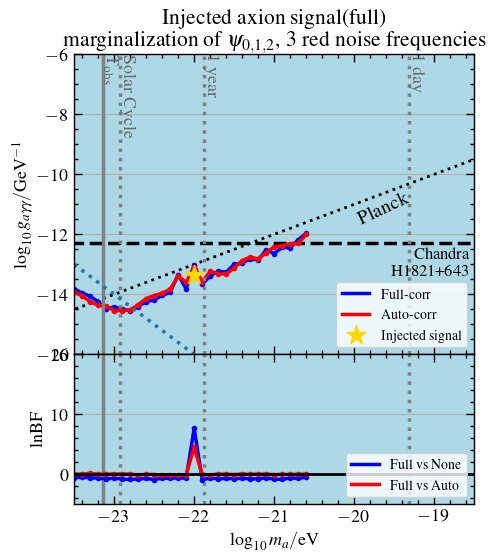

In [27]:
# True
fig,axes = plt.subplots(2,1,figsize=(5,6),sharex=True,gridspec_kw={'height_ratios': [4, 2]})
lbf_nf = None; lbf_af = None; ul_auto= None; ul_full=None;
plt.subplots_adjust(left=0.15,
                    bottom=0.10, 
                    right=0.95, 
                    top=0.85, 
                    wspace=0.0, 
                    hspace=0.0)


l10ma = np.arange(0,30)*0.1 -23.5


ul_auto = np.array([-2.17 , -2.411, -2.697, -2.923, -3.05 , -3.296, -3.398, -3.478,
       -3.402, -3.295, -3.297, -3.321, -3.281, -2.954, -3.254, -2.843,
       -3.44 , -3.194, -3.362, -3.482, -3.382, -3.229, -3.215, -3.372,
       -3.271, -3.172, -3.239, -3.269, -3.361, -3.159])

ul_full = np.array([-2.072, -2.312, -2.522, -2.803, -3.135, -3.184, -3.339, -3.506,
       -3.462, -3.4  , -3.437, -3.392, -3.388, -2.899, -3.47 , -2.775,
       -3.521, -3.344, -3.287, -3.42 , -3.26 , -3.32 , -3.268, -3.414,
       -3.172, -3.397, -3.292, -3.403, -3.244, -3.122])


axes[0].scatter(-22,l10S_to_l10ga(-3.1,-22),s=200,marker="*",color="gold",zorder=4,alpha=1,label="Injected signal")
axes[0].set_facecolor('lightblue')
make_ul_plot(axes[0],l10ma,ul_auto,ul_full)
axes[0].set_title("Injected axion signal(full)\n"+r"marginalization of $\psi_{0,1,2}$, 3 red noise frequencies")
axes[0].plot(l10ma , -13-2*(l10ma+23.5),':')
 

lbf_af = np.array([ 5.210e-02,  3.616e-02,  1.735e-01,  1.960e-02,  3.113e-02,
        5.986e-02,  9.045e-02,  1.600e-02, -8.230e-02, -1.180e-03,
       -2.712e-02, -1.768e-01, -8.871e-02, -1.241e-01, -5.599e-02,
        np.log(1.6813)+4, -1.290e-02, -9.113e-02,  4.910e-02,  3.365e-02,
       -3.885e-02,  5.949e-02,  1.042e-02,  4.211e-02,  3.059e-02,
       -3.411e-02, -8.377e-03, -2.402e-02, -2.614e-03,  6.018e-02])


lbf_nf = np.array([-0.528, -0.508, -0.542, -0.666, -0.74 , -0.649, -0.793, -0.846,
       -0.766, -0.684, -0.866, -0.633, -0.686, -0.551, -0.676,    np.log(38.7222)+4,
       -0.874, -0.65 , -0.738, -0.673, -0.751, -0.637, -0.771, -0.752,
       -0.589, -0.8  , -0.831, -0.6  , -0.689, -0.471])


axes[1].set_facecolor('lightblue')
make_bf_plot(axes[1],l10ma,lbf_af,lbf_nf)
#plt.savefig("Figures/ul_bf_iono_10.pdf")
plt.savefig("Figures/mock3.jpg")


## -21.0

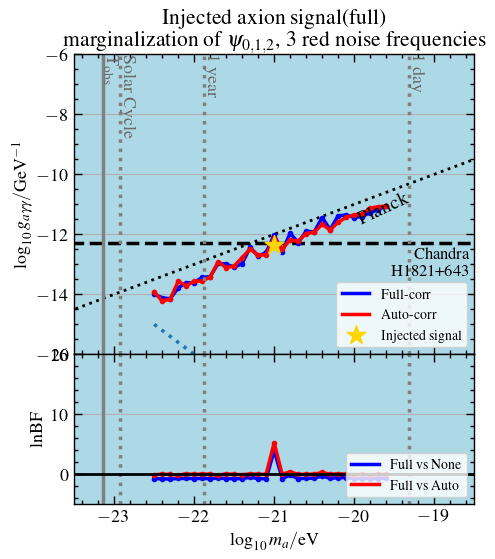

In [28]:
# True
fig,axes = plt.subplots(2,1,figsize=(5,6),sharex=True,gridspec_kw={'height_ratios': [4, 2]})
lbf_nf = None; lbf_af = None; ul_auto= None; ul_full=None;
plt.subplots_adjust(left=0.15,
                    bottom=0.10, 
                    right=0.95, 
                    top=0.85, 
                    wspace=0.0, 
                    hspace=0.0)


l10ma = np.arange(10,40)*0.1 -23.5


ul_auto = np.array([-3.169, -3.582, -3.617, -3.123, -3.369, -3.324, -3.419, -3.376,
       -2.971, -3.265, -3.314, -3.128, -2.948, -3.248, -3.338, -2.863,
       -3.354, -3.136, -3.284, -3.13 , -3.185, -3.023, -3.31 , -3.152,
       -3.087, -3.107, -3.191, -3.082, -3.135, -3.21 ])

ul_full = np.array([-3.248, -3.47 , -3.604, -3.342, -3.273, -3.364, -3.291, -3.364,
       -3.024, -3.145, -3.352, -3.328, -2.887, -3.284, -3.258, -2.774,
       -3.434, -2.916, -3.337, -3.051, -3.176, -2.799, -3.298, -2.938,
       -3.011, -3.195, -3.263, -3.229, -3.237, -3.196])


axes[0].scatter(-21,l10S_to_l10ga(-3.1,-21),s=200,marker="*",color="gold",zorder=4,alpha=1,label="Injected signal")
axes[0].set_facecolor('lightblue')
make_ul_plot(axes[0],l10ma,ul_auto,ul_full)
axes[0].set_title("Injected axion signal(full)\n"+r"marginalization of $\psi_{0,1,2}$, 3 red noise frequencies")
axes[0].plot(l10ma , -13-2*(l10ma+23.5),':')
 

lbf_af = np.array([-7.013e-02,  3.893e-02, -1.775e-02, -1.236e-01,  9.300e-02,
       -2.192e-02,  5.077e-02,  2.726e-02, -1.079e-01,  7.647e-02,
       -2.417e-03, -5.394e-02,  8.064e-02,  1.917e-03,  2.059e-02,
        5.285e+00,  3.917e-03,  4.346e-01, -2.159e-02,  3.426e-02,
        2.526e-02,  3.214e-01,  1.359e-02,  9.300e-02,  1.442e-02,
       -2.726e-02, -1.592e-02, -5.478e-02, -2.276e-02, -1.009e-02])


lbf_nf = np.array([-0.71 , -0.757, -0.776, -0.689, -0.669, -0.703, -0.677, -0.724,
       -0.612, -0.707, -0.711, -0.714, -0.478, -0.71 , -0.731,  3.973,
       -0.718, -0.114, -0.718, -0.654, -0.636, -0.273, -0.67 , -0.558,
       -0.534, -0.706, -0.692, -0.692, -0.712, -0.627])


axes[1].set_facecolor('lightblue')
make_bf_plot(axes[1],l10ma,lbf_af,lbf_nf)
#plt.savefig("Figures/ul_bf_iono_10.pdf")
plt.savefig("Figures/mock4.jpg")


In [5]:
"""
import glob
import numpy as np
def getbf(burn = 0 , printit=True , folder="./"):
   files = sorted(glob.glob(folder+'*/chain_1.txt'))[::-1] + sorted(glob.glob(folder+"*/chain_1.0.txt"))[::-1]\
      + sorted(glob.glob(folder+'*/*/chain_1.txt'))[::-1] + sorted(glob.glob(folder+"*/*/chain_1.0.txt"))[::-1]
   res = []
   ys = []
   #l10ma = []
   np.set_printoptions(precision=3)
   for file in files:
      try:
         chain = np.loadtxt(file,skiprows=burn)
         ul = np.percentile( chain[:,-5],[5,32,50,68,95] )
         
         chain0 = chain[chain[:,0]<0]
         chain1 = chain[chain[:,0]>=0]

         if len(chain1) ==0 :
            ul1 = np.repeat(np.nan,5)
         else:
            ul1 = np.percentile(chain1[:,-5],[5,32,50,68,95])

         if len(chain0) ==0 :
            ul0 = np.repeat(np.nan,5)
         else:
            ul0 = np.percentile(chain0[:,-5],[5,32,50,68,95])

         try:
            bestfit = chain[np.argmax(chain[:,-4]),[-7,-6,-5]]
         except:
            bestfit=""

         try:
            dlnpos = chain[-1,-4].max()
         except:
            dlnpos = np.nan

         y = len(chain1)/len(chain)
         ys.append(y)
         res.append([ul0.tolist(),ul1.tolist(),ul.tolist()])
         if printit == True:
            print(file.split("/")[:-1],"|",np.histogram(chain[:,0],bins=[-1,0,1])[0],
            "|%.2f"%(ul0[-1]),"%.2f"%(ul1[-1]),"|%.4f"%(y/(1-y+1e-9)),"|%.2f"%dlnpos,"|",bestfit)
         #l10ma.append(float(file.split("/")[0].split("_")[-1]))

      except:
         if printit==True:
            print(file.split("/")[:-1],"|")
   ys = np.array(ys)
   lbf = np.log(ys/(1-ys));lbf = lbf.tolist()
   return res,lbf
"""

'\nimport glob\nimport numpy as np\ndef getbf(burn = 0 , printit=True , folder="./"):\n   files = sorted(glob.glob(folder+\'*/chain_1.txt\'))[::-1] + sorted(glob.glob(folder+"*/chain_1.0.txt"))[::-1]      + sorted(glob.glob(folder+\'*/*/chain_1.txt\'))[::-1] + sorted(glob.glob(folder+"*/*/chain_1.0.txt"))[::-1]\n   res = []\n   ys = []\n   #l10ma = []\n   np.set_printoptions(precision=3)\n   for file in files:\n      try:\n         chain = np.loadtxt(file,skiprows=burn)\n         ul = np.percentile( chain[:,-5],[5,32,50,68,95] )\n         \n         chain0 = chain[chain[:,0]<0]\n         chain1 = chain[chain[:,0]>=0]\n\n         if len(chain1) ==0 :\n            ul1 = np.repeat(np.nan,5)\n         else:\n            ul1 = np.percentile(chain1[:,-5],[5,32,50,68,95])\n\n         if len(chain0) ==0 :\n            ul0 = np.repeat(np.nan,5)\n         else:\n            ul0 = np.percentile(chain0[:,-5],[5,32,50,68,95])\n\n         try:\n            bestfit = chain[np.argmax(chain[:,-4]),[-7,

Text(0.5, 1.0, 'IONFR, 10cm band\nmarginalization of $\\psi_{0,1,2}$')

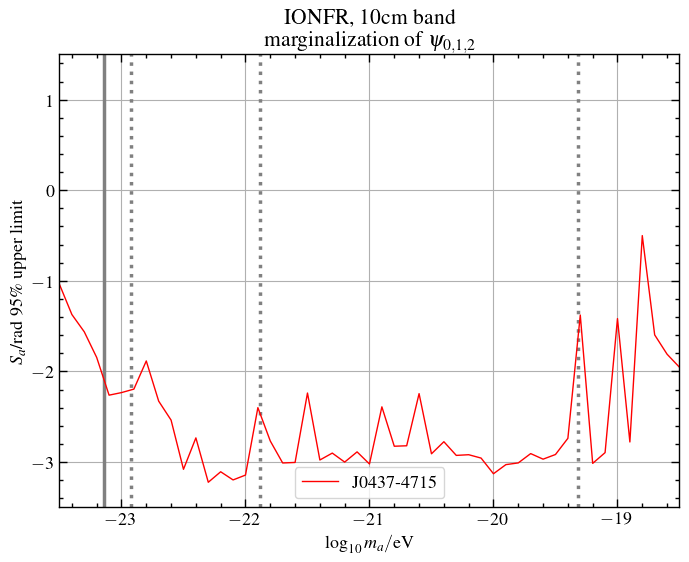

In [16]:
_res0 = np.array([0.6565190453675653, 0.23865683949757122, -0.01823730163040148, -0.40852859219550014, -0.7224547807254948, -0.9859917882017456, -1.322315816514064, -1.4389977261529965, -1.5844935367496964, -1.8222924569359469, -2.168059349792997, -2.2023323639731136, -2.482456517638295, -2.5020168073774283, -2.3150415163017066, -2.38497726889194, -2.5031302574558927, -2.5034511408926714, -2.313530568206365, -2.0928034504438555, -2.269893961978578, -2.2306984490549033, -2.1005498324969594, -2.2620289049374915, -2.0835578601915374, -2.4707821458438324, -2.2193429485216276, -2.233774940397888, -2.16787391308852, -1.922882370600175, -2.2473312935442276, -2.002434482261411, -1.5852171920443967, -2.1641694463649483, -2.161132007045308, -1.856802851249424, -2.1658541453414517, -2.1582452217124675, -2.143760199578419, -1.8036363007686305, -2.1051536379462132, -2.0365190829610995, -1.9190374848243763, -1.9742188969157195, -1.9625720384600795, -1.3637453899668932, -2.175456523306332, -1.2097564400786178, -1.3350635386760952, -1.8710907574399145, -2.0656338921011224, 0.3207627693347227, -0.09414957435159427, -0.454123973632456, -0.7875012541642891, -1.0725487525566848, -1.4858059166652493, -1.8558155697581014, -2.605591145248057, -2.710517185087524, -2.391136872725189, -2.350745455303187, -2.5430655749324327, -2.3297279180276353, -2.6793171794382804, -2.4442556370998396, -2.4552432249844047, -2.6814713858718173, -2.620366705259308, -2.4873871967504093, -2.5491643041681535, -2.185057590061789, -2.4955423666893064, -2.1304161610784997, -2.4774041572304806, -2.2051900977786674, -2.270054847006913, -2.2981043799062797, -2.4310471864701952, -2.336605410046076, -2.127503011111594, -2.3094373962723695, -2.1465219543110208, -2.3027792870549337, -2.281321553808734, -2.242517146185233, -2.462003473047973, -2.1904116924188917, -2.260436035298737, -2.3021875382354593, -2.1656968359743645, -2.241154590279078, -2.2440683486856865, -0.6642522890233997, -2.281906646520926, -2.2471337329428507, -1.0579962023754415, -2.3472220215809205, -1.0347458894285635, -1.1436415334439607, -1.2474005374319705, -2.3139820321770967, -0.8174501896681363, -1.2236588338924999, -1.4999683129517112, -1.882496628549916, -2.082504345234289, -2.36903978197317, -2.8036130770956067, -2.2266909332199325, -1.8217075236979574, -2.1194147047341447, -2.5597525310632627, -2.796954499589599, -2.416203073164124, -2.241732212087331, -2.240345546263844, -2.7110129089311363, -2.451254133748386, -2.206155959003149, -2.411764941903482, -2.366727252759506, -2.5466932185506246, -2.4443465798712114, -2.6571603684486282, -2.338009897520277, -2.5604133216156306, -2.0899186744590184, -2.6166950552330075, -2.521571644497172, -2.1994598237036054, -2.3869940215050356, -2.4027278593746515, -2.4474552906356513, -2.3976610299307404, -2.1272528707173364, -2.458194374332984, -2.46913138427473, -2.396312728922029, -2.26560303263844, -2.1024030008036148, -2.370339628165296, -2.3183654477551534, -2.3856610719842477, -2.3476029207050737, -2.1895894955817083, -2.3568349810408544, -2.3184529453851903, -2.3956093146103137, -2.379530270710929, -2.234597163978783, -2.122349019843415, -2.231043438747792, 0.3188653116870347, -0.07554011445754646, -0.3993287515070154, -0.7881316092068384, -1.0380882729766394, -1.372663871655993, -1.5281314813818663, -1.0390187437563732, -1.005013865516315, -1.5963024052180197, -1.7792853159437332, -2.054754934703528, -2.5894876049496487, -2.5605594969751255, -2.6608003174360353, -2.510236585345007, -2.2568538801030678, -2.0336400895281987, -2.7262624486940257, -2.485714779059377, -2.2355692373568163, -2.4010091809629315, -2.2030694636581574, -2.8473752494547684, -2.227551601837482, -2.819112654110676, -2.2973372317312775, -2.5077252102095065, -2.45791720646179, -2.4334527417702834, -2.0673490100620113, -1.9794776652306474, -2.2644846309959252, -2.1777694604878985, -2.202204362302662, -2.1790791912442593, -2.3190399499336607, -2.1926911530579107, -1.9074358073075683, -2.3792417858993216, -1.9504200727828114, -2.262374220890464, -2.0289767747767193, -2.558020141900312, -2.6147661364642416, -2.682913365511632, -2.60545668109584, -1.6740613154120463, -1.6752153763586624, -1.7430085992799267, -1.9104275773292565, -1.02816433923448, -1.4667976962930267, -1.687109332837498, -2.0285550838366273, -2.2518800524365954, -2.2745851634966376, -2.4246411131862513, -2.3866908058519307, -2.5147355122836954, -2.201081144974051, -2.439083975091451, -2.4491376117903485, -1.853113671133256, -1.5032741866263728, -1.6736755426129153, -2.4771079173867596, -2.423904926161113, -2.2047366894670133, -2.1536927534266868, -2.34711369959846, -2.36734921630355, -2.2509950261676153, -1.9141017927702304, -2.3842148226459337, -2.0313867901130336, -1.8494262001442898, -2.3194515987669644, -2.057381427523551, -2.06526811340812, -2.14522424591839, -1.9857015383238266, -1.9427260967468538, -2.2245791955371126, -2.0385551255387715, -2.2877407005402794, -1.9040643276255695, -2.0056927234894495, -2.022672074519607, -1.4739495110859264, -2.075051464157749, -1.7832494528925935, -2.1744232964521943, -1.9181913063779592, -2.020104650232438, -1.7640422866988161, -1.481876161859582, -1.758900692955007, -1.643818434792368, -2.0133743974807836, -1.9593702619506295, -1.987641493244428, -1.3867220048162143, -1.6126847239180682, -1.8738838894234406, -2.179149528426932, -2.325550567210943, -2.4472870911582243, -2.37684420258673, -2.2172160044387375, -2.3219411023299927, -2.358023787656356, -2.1421695721382514, -2.521010385622379, -1.93296497255344, -2.950233703346909, -2.4687865257929715, -2.7575535771589617, -2.431742620070946, -2.4923082614562895, -2.8408259863403864, -2.862750167306519, -2.7570974641844734, -2.4436072045220936, -2.4692066479007133, -2.6202016703949464, -2.55508522764461, -2.570794268361664, -2.434885499414191, -2.6809969032366467, -2.4647397921508096, -2.54335744436222, -2.2886076468215846, -2.4145060538363046, -2.417784298401754, -2.3843317355580274, -1.946159139217141, -2.584965072430303, -2.4237433847174548, -2.3348268008433397, -2.516259194732955, -2.4498645543284483, -2.245134468853763, -2.3576268847747244, -1.2587171317553842, -2.1225742839126336, -2.2226374130912236, -1.6893755627838876, -2.408791488997153, -1.513367766674064, -1.4404318422541444, -2.360283473342519, -2.260495769719026, -1.7570760695591596, -1.7977807582827603, -2.2063722836436694, -2.506443055245036, -2.728138915643821, -2.874823402721378, -2.884637847957535, -2.983641630367441, -3.027742544085887, -2.621533164045333, -2.9859169900542573, -3.1786386984586343, -2.6288937582302565, -3.0265760752916706, -3.0078344295507584, -2.6245747396767616, -3.001978234542049, -2.8634271857774167, -3.2344013483276712, -3.1686815436045777, -2.9226899348887025, -2.865088257274892, -3.034423070169252, -2.8470443915601225, -3.0469450611976066, -2.361149912813999, -2.9419346089325797, -2.6864084184609514, -2.890253007907823, -3.0415060549360997, -2.7688971872203307, -2.670415047723485, -2.6180647893813025, -2.2588640031805545, -2.862733572568282, -2.5247990771747464, -2.7364059159510394, -2.735210589273091, -2.826344395607903, -2.81718587854126, -2.842743123040983, -2.369056437990686, -0.9567579720737123, -2.7670693514277582, -2.6207306961722643, -1.4654768631601063, -2.8565897263059505, -1.535970570763165, -1.5920343781374617, -1.735763598963915, -2.653787181581808, -1.5431453839539462, -1.7038042192547955, -2.1472270019425186, -2.304112405784124, -2.5527172303214205, -2.658548564642568, -2.663334129224415, -2.5667308144521623, -2.79971441865854, -2.8389068645098017, -2.7548306011465047, -2.3147375677755644, -2.4741892571795874, -3.0948756932589143, -2.9136687637355383, -2.724681092280872, -2.785814736690441, -2.596820252922543, -2.730036514812579, -2.6560113595755825, -2.7345733795631646, -2.8515149381822593, -2.685728543722199, -2.542243411135293, -2.7984979113526154, -2.4397402778135557, -2.622389174161511, -2.832216889902317, -2.5559942118912495, -2.691354302621961, -2.632773206937107, -2.5614347823993295, -2.684280523835785, -2.6744375062818264, -2.4755022623466325, -2.6642355392072417, -2.677972261979848, -2.4159197203436307, -2.523274060895438, -2.550596587856756, -2.5190551549328046, -2.625264941054191, -2.6263686454994515, -2.2224624072153496, -2.5554053971079798, -2.459150764638017, -2.432323086011016, -1.8060756796719206, -2.542690217734357, -2.3555469755719756, -2.296887678721108, 0.38711523681358456, -0.012065986142054579, -0.4635472920600954, -0.8190428046933683, -1.153124141569729, -1.4371399038714778, -1.65362762612267, -2.120234331976424, -1.8770473345601613, -1.8901594191901114, -2.126948942287664, -2.5116543526384474, -2.074356944293308, -2.3769443617147514, -2.778663213478618, -2.8844330546713675, -1.8432962780936981, -2.5252861661428416, -2.0942945227893275, -2.442001494892145, -2.733213526885569, -2.529224116422381, -2.287667311897281, -2.8667610332477613, -2.8675415825608335, -2.3189817506010484, -2.1735241548488315, -2.418343441291305, -2.3451660496152424, -2.4051842035056388, -2.6089614937729175, -2.231768292563662, -2.300587237229961, -2.5339429340293536, -2.236992873045814, -2.2946088955356823, -2.1958760813556246, -2.2002189362683344, -2.355511441791959, -2.0268770542306376, -1.926050834759386, -2.286834598240757, -0.8850591101791512, -2.192980176799426, -2.071946600501456, -1.293144227360881, -2.3890374721657133, -1.4859143421848935, -1.6004203200830174, -1.6785998278293965, -2.3557277781084633, -1.0914970337281995, -1.3126320960194817, -1.6575799287662325, -1.9498330082560675, -2.1623743960138864, -2.307667980105531, -2.3771840369924124, -2.4960633544896136, -2.7294462159570267, -2.8402768891178063, -2.417374050172019, -1.7466257778910088, -1.801059266196323, -2.5162224003381017, -2.6515311458004507, -2.2172352377335156, -2.245996442241791, -2.629323144752724, -2.6632087516446816, -2.773150658576404, -2.685842192001612, -2.8311279421289206, -2.563287286619843, -2.7791468534183634, -2.4826992470677967, -2.1602382185075135, -2.5586405739531606, -2.668941412203265, -2.378740937228645, -2.5885856513704444, -2.5228225096618657, -2.4157459149356093, -2.28678552001658, -2.1707773793298735, -2.5795625084820966, -2.4655513356786747, -2.537612485921487, -1.963837265676908, -2.2719865988527386, -2.4357081007167123, -2.452218253616127, -2.527723228830452, -2.135153165628928, -2.08817866088214, -2.4816111688383993, -2.375077780873144, -2.6438019483329382, -1.9549964701763356, -2.4494284274979585, -2.4160403060276607, -2.5163632277084407, -1.3286291259648242, -1.4044711454212067, -1.8501305057056503, -2.0712837603794108, -2.416050016839251, -2.3128122988282795, -2.455219038846745, -2.5216472525264937, -2.662079744218025, -2.4480746591171716, -2.534039208321112, -2.5861552181910974, -2.7544561576489217, -2.642354344460851, -2.3885127359987344, -1.928265784841201, -2.638215811516681, -2.5176289026255025, -2.2592185285667528, -2.42382900092245, -2.389931684826902, -2.4271625942392077, -2.244982554755749, -2.254884043706503, -2.202375698393245, -2.463534151255612, -2.416753918738527, -2.2833979535063595, -2.188736094077523, -2.2286880002271645, -2.1966221922709854, -2.294996281026119, -2.2008769435337925, -2.263522504414071, -2.255125566296889, -2.167315018817401, -2.059436749459157, -2.105881999103325, -2.2556573803439437, -2.3572744258757234, -2.0625982688096585, -2.2436388159864187, -2.306735804078119, -2.157281390908679, -2.170235200048522, -2.254079152795014, -2.1774098845637186, -2.2334820791424765, -2.279088793384087, -2.2667236383822633, -2.0309750152912884, -1.5187764094079264, -1.7755176369971646, -2.1768376119767883, -2.445292433703241, -2.6095494707930667, -2.559163255916395, -2.5897693745376054, -2.3749029584617234, -2.8335602919467355, -2.4539054532217084, -2.5652335883320054, -2.8708943099327042, -2.972035289454318, -2.792553060147825, -2.787295801922072, -2.9530378244758366, -2.8232908409196082, -2.7845768246959848, -2.00321629716787, -2.437458526189409, -2.3586224573487127, -2.6659941862267047, -2.5325162646492076, -2.813579599492585, -2.63383040366402, -2.6759348054621905, -2.944719568552607, -2.7935866705783248, -2.664079390963209, -2.7590416822544164, -2.497891812154062, -2.8422096287272374, -2.535360108521424, -2.6645454386728127, -2.6394847403739594, -2.6492882273069682, -2.6134096125743334, -2.5353084712318315, -1.895711896020422, -2.0726873362421085, -2.567816471064687, -2.6215058362623287, -1.1641056161650944, -2.716671063156065, -2.171167385928752, -1.4463339071737915, -2.583283436724552, -1.5877650203464158, -2.1291018618959385, -2.484841180000953, -2.589866947227236, -0.970443848516018, -1.1543822747563826, -1.5655751571342638, -1.7366373769874384, -2.1161873435820664, -2.2942213611068243, -2.585831065719506, -2.740616659145428, -2.6959932648531364, -2.6431479930453543, -2.3786812337048255, -2.7694023367290432, -3.0217643174311344, -2.5202878399511874, -2.607529125723019, -2.820714663672505, -2.6093915459518633, -2.355735762802821, -2.474090844512388, -2.848642648564009, -2.272769362219965, -2.477427581352191, -2.759574489502182, -2.3652844883294577, -2.7203477009433867, -2.6786665519808435, -2.8331180950459047, -2.7847296825023995, -2.787009666197984, -2.757274293160166, -2.533179235904551, -2.3976240159304965, -2.7317841312567896, -2.3455731774873505, -2.707230778446092, -2.572316565235547, -2.319513635071619, -2.3401118002528603, -2.492363396555859, -2.167521756099177, -2.4968811419052543, -2.7062839766621627, -2.5397365882354594, -2.185387796070058, -2.5145843101401906, -2.4196800769459648, -2.6084069538596273, -2.4185013175775207, -1.8308264152424005, -2.4173817377169575, -2.1997496125510256, -0.4846407242382174, -0.6526263853735002, -1.1113079842862197, -1.2341276018006693, -1.642097315347569, -1.9440637173411288, -2.314988131150236, -2.5113142479060726, -2.6742132125001516, -2.7495644517145075, -2.869380552326353, -2.8681329871702634, -2.8682545318024264, -2.7157752188395423, -2.573850800719028, -2.233369955010238, -2.5565223462885642, -2.693066222379561, -2.790798909192747, -2.7334913617626126, -2.501415833594824, -2.3499270105147496, -2.591606528089874, -2.6421052635014157, -2.6304657585799105, -2.4675703884064397, -2.4642382538484333, -2.4364899387287373, -2.613108640662397, -2.5275294944471867, -2.14670427743328, -2.4446383436629033, -2.6354177459948196, -2.61280836758631, -2.456765358895213, -2.322684175635597, -2.267620491378078, -2.377177944747508, -2.1592452572577763, -2.463100290602407, -2.4164429092211743, -2.450647050962706, -2.195994008750869, -2.2326171333455607, -2.4859304267340443, -2.435992108620383, -2.360062020536286, -2.4987178496840623, -2.491729082518783, -2.507591605838229, -2.243031077799397, -1.0374900076969893, -1.5091353943878165, -1.5511300259231178, -1.9718577695564652, -2.1611654667720197, -2.4639793336433615, -2.5204450063647217, -2.3553121574151406, -2.229867096591668, -2.503842934500953, -2.464628607051284, -1.7632595563660685, -2.6737448868801583, -2.3936908354581217, -2.8534482223836397, -2.551579261862498, -2.6308680334176757, -2.5924975499101732, -2.698485910424091, -2.6707803964703865, -2.708778821322694, -2.483496127965127, -2.5071348382174183, -2.2733275138431703, -2.704449070371237, -2.654734534415166, -2.653608131124037, -2.3919067570618173, -2.532904985266159, -2.431157494578535, -2.5311408443268726, -2.4882650665127164, -2.2592263354601303, -2.53491303221673, -1.8441230809733122, -2.333670175354739, -2.395870566915328, -2.351280707970176, -2.0326291814612945, -2.0875263722018285, -2.2335824803438302, -2.230364677251018, -2.4195903655842197, -2.3325350084841747, -2.2751873540702117, -2.384328867123831, -2.2550590020770716, -2.4127999181167135, -2.4172537164697077, -2.4477416017173232, -2.01118540658951, -0.9849083001573065, -1.321084659758227, -1.713725352448165, -1.8730629832402972, -2.322467005120678, -2.5534867064492075, -2.8052659397108606, -2.5850951228329357, -2.44715365605737, -2.4388393563691397, -2.5394860270800645, -2.4751013272975713, -2.880220965198676, -2.8712694278577398, -2.752089703364277, -2.6964533580149554, -2.510862644543481, -2.6425155604986066, -2.729348412121865, -2.6097395517686417, -2.2825881396241514, -2.360617132558158, -2.6512355788784974, -2.6168142305360234, -2.4976127834623907, -2.519454324954355, -2.546665314126575, -2.4292547468048564, -2.449580417127561, -2.5460008811559383, -1.6303026792970374, -2.1457962605933507, -2.4013369552754447, -2.1813148928573636, -2.3699308216859225, -2.3953632114895806, -2.3379888939182845, -2.1846542358655423, -2.276883530031583, -2.290732930955094, -2.134957596704358, -2.3501164138212003, -1.9682854563891161, -2.1612114694063878, -2.2296852451082354, -2.0746578954461157, -1.8906556093817615, -2.2671374526895627, -2.3934473288288025, -2.2961481354400237, -2.049519686984648, -0.009890481543737922, -0.44781754253193057, -0.8359865279909805, -1.1380555684369011, -1.5004831735813509, -1.803024170828632, -2.0015563658930096, -2.1414366892511674, -2.590201533384708, -2.947676101373534, -2.809074713617279, -3.073026145484151, -2.0287730789217115, -2.006818000319062, -2.9074739637267912, -2.605527447131079, -2.530002179496335, -2.4395902809867027, -3.0687086779951067, -3.084106595341873, -2.9811730055383747, -2.766575277422786, -2.537486771710496, -2.588888554190224, -2.487849597893343, -2.8991553609400493, -3.0204098678162583, -2.7904907925648117, -2.6292790055891486, -2.6571144526944637, -2.5947684774052786, -2.448223165364748, -2.4568983743081274, -2.7154952722510544, -2.7380299921045483, -2.617004783794003, -2.8143604735981373, -2.673680823977278, -2.6614346399735007, -2.7387743505980007, -2.7668820283011835, -2.719216571711344, -2.5429025529415457, -2.642838794424645, -2.5841339723200285, -2.213768739158654, -2.464348123445573, -2.4288085513098174, -2.5452842186913625, -2.584010606978571, -2.548551169320998, -0.35152783940992327, -0.6852782898261914, -0.7135469051068791, -1.117839863782132, -1.4892890599758237, -1.656497967676376, -1.7945506766014667, -1.9032739898726785, -2.022988664838334, -2.3855215739974582, -2.485987087179046, -2.425901723929588, -2.356603533089337, -2.456955772530681, -2.407988002295742, -2.276104273736566, -2.458148988722225, -1.9934110177674302, -2.4604008319803286, -2.338856998383761, -1.6576446907227393, -2.1481683468385793, -2.3762933898280636, -2.3946212006667205, -1.8746554819579966, -2.397227298054851, -2.250206561073327, -2.232485952926819, -2.303042749318203, -2.324763245770733, -2.0788591890050507, -2.012475258378731, -2.2825367171765913, -2.228241451800807, -1.9576085119416393, -2.2294837431040437, -2.232845036473429, -1.9464467751299084, -2.318071613462191, -2.0134700950016917, -2.2332709880286843, -2.2196494024353566, -1.1493627495055871, -2.151401982111008, -2.25411036231928, -1.10259438225487, -2.221660600973623, -1.1503893943156398, -1.9948582453945636, -1.9993935236609797, -2.070953459825757, -0.5124354303052502, -0.8428335538329238, -1.1329312539537424, -1.3341309256899576, -1.5538328037107147, -1.8089556640873083, -2.09056421335382, -2.3222555029159326, -2.2560905343492577, -2.0497482368064945, -2.0956289709198854, -2.358525909653102, -2.396189834939615, -2.3510065644089555, -2.057976596470315, -1.9728069807377517, -2.1190814663987094, -2.1065386200874503, -2.2628218689661015, -1.9763379806364139, -1.335675175263021, -1.4541203895801584, -2.1878972056141865, -2.2833669874213482, -1.870816450446417, -2.2573085717089576, -2.058041496712267, -1.9399547648232076, -2.0452267167930933, -1.8347868567736867, -2.1155466737190447, -1.636172465148514, -2.0915658645460162, -1.5003997751748053, -1.9177446252865737, -2.0957643068495253, -2.0147942287585714, -2.1230609402365626, -1.8586092327339705, -1.9544200913010508, -1.9706193637074605, -1.044903797484289, -1.0609356279844777, -1.9430679316400514, -1.9389913649503008, -0.9340825993060021, -2.0701934978158154, -1.1979951745001407, -2.0443825972917584, -1.7688053468026246, -2.0163476578475197, 1.064093183456761, 0.6486591626971149, 0.49122811622263435, 0.17359271446921828, -0.1131464755596263, -0.33324292014382023, -0.5175490360839348, -0.899876484778106, -1.2422186263213493, -1.4223876014595602, -1.865104265618626, -1.9973185575487014, -2.1174156971053444, -2.206674091641889, -2.400353091413706, -2.3247835271828423, -2.1415027039573804, -2.229342857358031, -1.7726522567970597, -1.9088111903658262, -1.5279266513515415, -2.1221026532942604, -2.3555901165575164, -2.2830335147158, -2.000911248460493, -2.001704121276964, -1.8847240510800836, -1.756264806990077, -2.1893908336792958, -1.494254141439524, -1.868629546778499, -2.098768242911943, -1.9171428149243204, -1.671230521398268, -1.99171884324617, -1.9164976665229942, -1.897308533437702, -1.8803793888680247, -1.9789379528769602, -1.4750177213691447, -1.7824105198260596, -1.7994087422207248, -1.7539739993037384, -1.7727639624992066, -1.5236602104628365, -1.6706097322927815, -1.5859042110644603, -1.3681555759577544, -1.5298936364062476, -1.537986562286326, -1.431732840581683, -0.5008465944432331, -0.7219598417628961, -1.0602146962621268, -1.2540981835450806, -1.6638316808750095, -1.948127199137198, -2.1158096633170316, -1.453606947254068, -1.5619103183159302, -2.1795702045694556, -2.291044797425507, -2.2825551688927974, -2.1044931968292446, -1.9810776704405784, -2.0243160569435, -2.268922354279517, -2.268114025673227, -1.7353255256579905, -1.633229924116148, -2.0405135263350007, -2.301255066615782, -2.047390243792926, -2.0109267627041034, -2.052529076956237, -1.4755824390505832, -1.9571512600973489, -2.0685099298313245, -2.01787983155719, -1.44965492388761, -1.709198215838139, -1.9779656902885792, -1.6082680777656604, -1.93108630495896, -1.9616135750742352, -1.8097161619717679, -1.6015748680873907, -1.7434184313667533, -1.8733994546775492, -1.8231578600707234, -1.924905712225, -1.8668556822717444, -1.8812012865388401, -1.675228800351619, -1.9318574179753072, -1.961369316402783, -1.9007705601597285, -1.899012274047938, -1.7804478669859172, -1.9256490638679997, -2.0118865744853074, -1.8991074701054844, -1.0392559929827512, -1.3715305613251865, -1.562807401594092, -1.8451892984042706, -2.2617127125651657, -2.2334420520062586, -2.1949675187249573, -1.8842053578386408, -2.3276070442370966, -2.5369511070944117, -3.0800181280045504, -2.733365874014631, -3.2231132232206376, -3.107278901681474, -3.197342571724972, -3.143880129747176, -2.399536539354425, -2.7675820232412613, -3.0103109915078576, -3.0043696191011953, -2.23812214228406, -2.9774341713555197, -2.901103915987137, -3.00044838599643, -2.8877392685687924, -3.0214055842591825, -2.3906431905128804, -2.8254509989885848, -2.820375174386468, -2.24481560871806, -2.908946402929176, -2.775572276123593, -2.926567817626915, -2.91904601956943, -2.9561417286199836, -3.1291100828753216, -3.028496281335839, -3.00952530941046, -2.906708325963465, -2.968109975071879, -2.9167494042500786, -2.7381483425169963, -1.3777180711321122, -3.0146216800933794, -2.896049120182064, -1.4165675057968647, -2.778368073591265, -0.5005235333175003, -1.5964839609745225, -1.8096180803984012, -1.953632349381164])
_res0 = _res0.reshape((22,51))
PSRNS = ['J0437-4715', 'J0613-0200', 'J0614-3329', 'J0711-6830', 'J1017-7156', 'J1022+1001', 'J1024-0719', 'J1045-4509', 'J1125-6014', 'J1545-4550', 'J1600-3053', 'J1603-7202', 'J1643-1224', 'J1713+0747', 'J1730-2304', 'J1744-1134', 'J1824-2452', 'J1857+0943', 'J1909-3744', 'J1939+2134', 'J2145-0750', 'J2241-5236']
res0 = _res0[::-1,:]
l10ma = np.arange(5,56)*0.1 -24


cmap = matplotlib.cm.get_cmap('hsv')
colors = cmap(np.arange(len(res0))/len(res0))


fig,ax = plt.subplots(figsize=(8,6))
ax.grid()
ax.set_xlim(-23.5,-18.5)
ymin = -3.5
ymax = 1.5
plot_timescales(ax,ymin,ymax,annotate=False)
plt.ylim(ymin,ymax)

for i in range(len(res0))[0:1]:
    ax.plot(l10ma,res0[i],label=PSRNS[i],lw=1,color=colors[i])


#ax.plot(l10ma,ul_full_10,label="Combined",lw=2,color='k',ls="-")



ax.legend(ncol=3)


plt.xlabel(r"$\log_{\rm 10}m_a /{\rm eV}$")
plt.ylabel(r"$S_a$/rad 95\% upper limit")

plt.title("IONFR, 10cm band\n"+r"marginalization of $\psi_{0,1,2}$")

Text(0.5, 1.0, 'NO IONO, 10cm band\nmarginalization of $\\psi_{0,1,2}$')

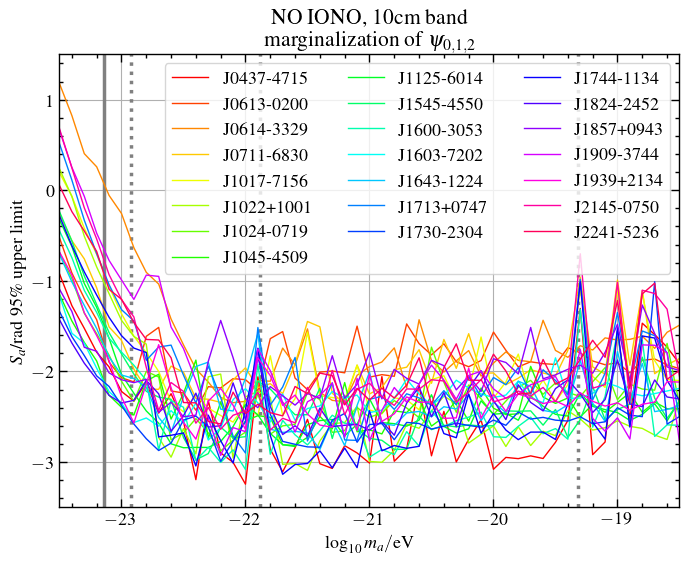

In [20]:
_res0 = np.array([0.05239414996831346, -0.235644349885926, -0.45009713285288067, -0.6755787519328165, -1.0940146287159622, -1.2032418809176113, -1.4603121189131918, -1.6467668976802148, -1.6527280877080408, -1.849316224523866, -2.3429853106743272, -2.3465004828890432, -2.5515037614066403, -2.5804096119700364, -2.2290038712137585, -2.463692187355437, -2.362566417415641, -2.45514773506459, -2.4906840740228784, -2.1661570882237964, -2.2448612912333314, -2.018290589742473, -2.0461750700148857, -2.3687215082956827, -2.18664065601199, -2.31518870049487, -2.1850714099284647, -2.2934008579992518, -2.1507107327577764, -1.8487072230897097, -2.3664805291314424, -1.9579770014368922, -1.695524882945047, -2.095933498434016, -2.098266841334281, -1.8095841327382394, -1.9956291723136461, -2.2497435048603482, -2.236770565019094, -1.8677477934520381, -2.140194026290804, -2.0707783854858537, -1.8664098814021841, -1.6556058317981177, -1.8436219859956504, -1.2176785115273268, -2.190319459771851, -1.144016928167235, -1.025900395721906, -2.087086272221269, -1.9891469738047212, 0.6801169743798309, 0.24615419383015588, -0.19309603817478985, -0.5378322900841263, -0.9318085701548242, -1.2051849371987982, -1.3990165156921357, -1.9551071730292326, -2.429908553820936, -2.1223517495450217, -2.220532683839496, -2.5709580429155072, -2.397359651670658, -2.638479863970147, -2.483807478707704, -2.434918515209174, -2.228677560769735, -2.64800318468566, -2.5168494014737934, -2.567382376518448, -2.176028030979337, -2.500512714905835, -1.988723807121695, -2.4787438058222673, -2.19927090355405, -2.130350839559433, -2.2770581549438185, -2.375042065014559, -2.1929203276879914, -2.1964162477797435, -2.091676389906444, -2.1051279186194423, -2.3400891269727047, -2.228668498692594, -2.089202731215014, -2.3359741918309136, -2.295458510306358, -2.216433767712444, -2.270251047316718, -2.1764289152469845, -2.3345810649487646, -2.092149227329189, -0.7013178543692271, -2.184336308410302, -2.1454537230388993, -1.0151584072599003, -2.329623288516228, -1.1035751262566234, -1.13965148234089, -1.312205313708862, -2.0541159550912234, -0.6807928921760243, -0.9380013531187683, -1.3510136927549312, -1.603092984532882, -1.8808796379346522, -2.280086316248325, -2.569179385689993, -2.1351897383192187, -1.7046052630734805, -2.180196354955194, -2.561556925129837, -2.746778287028528, -2.3280155496382973, -2.1877314476123337, -2.3726251485408127, -2.6397675474240754, -1.849438688782752, -2.046544980261093, -2.3743069567045683, -2.2608438723257973, -2.4702183120489076, -2.59165028317115, -2.6162227249663497, -2.3174613735307967, -2.6498344431257457, -2.0349792934448447, -2.5519115835070685, -2.467060518374445, -2.2811196962326066, -2.340408062851153, -2.3363629780127915, -2.517982883793494, -2.512396020967467, -1.96311355071703, -2.517180753145976, -2.252046136118071, -2.4397367925819164, -2.2491291654112424, -2.2905047965986443, -2.3547783758197705, -2.324928702154786, -2.387839437852499, -2.2350886643377224, -2.329041232208769, -2.3823476397019676, -2.34618682264875, -2.428513531415611, -2.362417085124115, -2.3380461350612562, -2.1124225977000752, -2.117266605167216, 0.661394134329636, 0.2531982630448427, -0.06645222769843301, -0.4741003992353731, -0.7743346131667119, -0.9895869980127916, -1.2046492175793555, -0.9363827528930275, -0.9506233575255424, -1.5096997856183663, -1.7470478898583304, -2.100595005718104, -2.5169226680711927, -2.9269044548742293, -2.6198193372837344, -2.664155750623823, -1.7508754322037823, -1.9916300863496657, -2.34130348856242, -2.6690928167421695, -2.334615541290257, -2.261550440247631, -2.127527652927012, -2.726250317235305, -2.0763018092326266, -2.767460391158152, -2.430601980734597, -2.1774334509434, -2.338917534057589, -2.1408450665013734, -1.9309055353154192, -2.095432252391962, -2.3066803620634553, -2.0441562420955393, -1.9976681802595935, -2.1923603868470223, -2.2955582279043028, -2.2511279829942543, -2.1467387258108266, -2.0984453353982686, -2.055655235680561, -2.30230621189714, -1.7580089978790645, -2.518105816869058, -2.658857206665913, -2.5119474921480767, -2.7461713679179818, -1.7069170757741163, -1.7109842871472263, -1.7934484984805033, -2.777875992092301, -1.0918371794811024, -1.3379600316646207, -1.7334623529255988, -1.7767551481393962, -2.0159881777673454, -2.09160201380944, -2.1235093764167576, -2.0871759600096937, -2.451513038889726, -2.3390570574516465, -2.5003342467405645, -2.482375585130031, -1.8885782212630153, -1.4368051537681117, -1.8477590673499555, -2.3023329398637724, -2.3996187469234784, -2.166857622248484, -2.2689915463499815, -2.3715414070834946, -2.2440509624111726, -2.296273881921805, -1.8264607197965896, -2.2960348226500233, -2.1419526181819277, -1.7941463290670443, -2.302401510769769, -1.9767565793715702, -2.0757187614158914, -2.1393292539650393, -1.8777110193613054, -1.9360352306061825, -2.2034403337367214, -2.0508525322826494, -2.2210433221120183, -1.8599842992816016, -1.9009925016550369, -2.027857405320661, -1.5143830499606532, -2.080843886196507, -2.0374083816923676, -1.9763790190227657, -1.9298852163624687, -2.01938786490257, -1.7893737939058378, -1.479339482394973, -2.1069073275207275, -1.2667910243453497, -1.5813148745877406, -1.9498884779108439, -1.9888803039249467, -1.4289967243542678, -1.685622889141265, -1.9088239388199675, -2.0858542371135735, -2.2638205731096672, -2.348660940289226, -2.318918431294789, -2.098652349492069, -2.2470960467836782, -2.6600731976052425, -2.4883276574162285, -2.2398450135725527, -2.613860784957164, -2.5988601471098876, -2.126554680757188, -2.5331534782534693, -1.8410700078003448, -2.3869320544100328, -2.696131515122442, -2.5993349134422123, -2.7143476442088175, -2.4040059569520156, -2.607727573637751, -2.594395777962542, -2.5842367684261793, -2.647331723243886, -2.552336618085309, -2.7039055391447437, -2.349328986293418, -2.1749957106672393, -2.498852241266767, -2.2333027917919774, -2.6096000651955102, -2.186873093542337, -1.991710597775127, -2.320260498759427, -2.5313012629561302, -2.1476651950560766, -2.341577095645117, -2.4353013979817106, -2.1892189433236986, -2.092662675918512, -2.2477569182175, -2.4528514079407278, -2.310367516165101, -1.8738166824733506, -2.359444476794925, -2.3881615721275558, -2.0939759496422807, -2.2820510472958673, -2.3028698388795337, -0.2833350852065799, -0.6125880575025048, -0.9005667812787667, -1.1563646042814097, -1.4028490754380076, -1.6046974317496407, -1.742185815715577, -1.7910291392056892, -2.722431067056683, -2.7043048798516858, -2.678976583189257, -3.042934799239222, -2.4826406701758668, -2.7642967086630876, -3.010130067957433, -2.419495430672132, -1.745373974769919, -2.706599684962915, -3.134944049286736, -3.0270474225449235, -3.015676351101261, -2.8766073312381852, -3.063882194717258, -2.84548306757287, -3.06127855165957, -2.433817273496958, -2.8756364444974096, -2.817587731584763, -2.8485443132816957, -2.826328459038835, -2.339602692771241, -2.685622339345723, -2.731443635626272, -2.2474293584045095, -2.682172282110652, -2.465293627411837, -2.6468002064700658, -2.752715404603396, -2.6696398552174694, -2.6691196598322176, -2.750439849853052, -2.3509502064649923, -1.008184094801673, -2.559414877202, -2.747290792004975, -1.5184046087216778, -2.613747009710984, -1.608336914510401, -1.6313166255202336, -2.0984994106907937, -2.3212201121856664, -1.3368312711113222, -1.6153805012971663, -1.824333157099348, -2.049219743186787, -2.16579593258305, -2.3744618857226643, -2.580673665801384, -2.742456331922164, -2.872783511009195, -2.790521886147086, -2.5373050379116484, -2.4924595828854423, -2.610506612019892, -2.991956947151046, -2.769695619733158, -2.5546219280255937, -1.7455664541289684, -2.471414743155315, -2.7719669597124432, -2.804047196636297, -2.8326582875239708, -2.836392808044471, -2.5363531526596588, -2.4631717854117716, -2.78147977032196, -2.586102464591302, -2.574688681801467, -2.7536261028517854, -2.5624455609555383, -2.5750788230434027, -2.6356609239633215, -2.6051998226382733, -2.570394265053085, -2.5961683952720773, -2.6154425356626883, -2.536471458824631, -2.5944312349100596, -2.4469601784932857, -2.525907163800386, -2.506847144068469, -2.5374709319336652, -2.5475552285818837, -2.5004167487392595, -2.577150943569652, -2.5555388171250306, -2.400164864544771, -2.482221268071737, -2.498990267732214, -1.0100766026134698, -2.581306484841582, -2.498052258318515, 0.5145203185900828, 0.11201595614685508, -0.3298753768966727, -0.7001978930250701, -1.042327201622717, -1.31759095620264, -1.4430697652100475, -1.876891850475598, -1.730281519611812, -1.7094155276601357, -2.040592967035564, -2.3497442604075474, -1.940657376008329, -2.286954916471074, -2.7130837595732347, -2.899866937644462, -1.5156172390856448, -2.371197560906954, -2.1717876565052405, -1.8453789470574138, -2.7673439574980216, -2.435794074374576, -2.125930412843462, -2.7561863780442195, -2.7606608595143074, -2.307137613305045, -2.273938037322198, -2.418937948176243, -2.246831043518147, -2.292588323288735, -2.372797844039633, -2.2121841300302845, -2.368375292537729, -2.059139426147384, -2.2791163835638217, -2.0666404914837773, -2.145770849844957, -1.9582509005052675, -2.2501471001250124, -1.9816047339863236, -2.099661074886264, -2.255904803065409, -0.9824636095154541, -2.3136723525500105, -2.0191107673445425, -1.3497683458676526, -2.1472665865019565, -1.5535146864624565, -1.6051855020984462, -1.7943978987510574, -2.5070501131700915, -0.7074664591387652, -1.011530554697587, -1.2708919832204795, -1.526224456358913, -1.841120916495437, -2.0394969914746803, -2.0775562006907373, -2.1743549975235297, -2.508185122396967, -2.6751537866148802, -2.280025772169093, -1.9455246943422144, -1.8973581280207443, -2.415810573862192, -2.436346300608381, -2.0753365796462435, -1.5813026902196443, -2.6366828054836313, -2.672796324635998, -2.6603344367278976, -2.6795176850816187, -2.8616847074416847, -2.5392801476233497, -2.8185463718024626, -2.375517289336573, -2.006991944222711, -2.5770382580051314, -2.594661937023136, -2.459078920980501, -2.4413495976720245, -2.5004895529080513, -2.3893423403562015, -2.4137984640872507, -2.257181729191533, -2.542704574090451, -2.338161201004304, -2.454920789119401, -2.1080777821196284, -2.1635109129014127, -2.430022928475695, -2.452837850974345, -2.36712688311845, -1.878410576939413, -2.3506346464089165, -2.5514847824617823, -1.7796953907026465, -2.341725782958769, -1.9114476805560972, -2.443439419982772, -2.4190945150110577, -2.3761666642783803, -1.1616138872903843, -1.57850531404923, -1.6884346086040127, -1.9641777336380593, -2.222361491150236, -2.3472387378439077, -2.564087080709559, -2.5136285339459032, -2.6038107505892496, -2.432455589608535, -2.57227252738529, -2.3485701215083963, -2.757053922390961, -2.6194291633705897, -2.310532781595882, -2.1904014516798047, -2.347670672004973, -2.5571957445885682, -2.2482219148141467, -2.538993869994985, -2.408714489548137, -2.3809116108603003, -2.2210989620968355, -2.293546401005289, -2.2611903941541085, -2.454167034947645, -2.427705037141911, -2.2960695346736872, -2.0852655499790225, -2.2505276861885264, -2.3715338295114288, -2.2706069415027903, -2.097047038727458, -2.183616663352307, -2.248422850427987, -2.2874172325495152, -2.260844469553889, -2.1070929342374503, -2.287591422496266, -2.3453116443197253, -1.849788777245814, -2.2974215562613596, -2.2929577000974133, -2.2419363402580132, -2.1229368827859467, -2.1652288404746534, -2.2376992081275744, -2.268281842070147, -2.2442604132328468, -2.215749607678103, -2.1862066384012864, -0.4477280734502389, -0.7438133505413949, -1.1050680108694741, -1.348474543605832, -1.6336628763771153, -1.7861962847233777, -1.9316462378727008, -2.0971724727248016, -2.865874060459363, -2.3197780911301753, -2.3953957641135437, -2.9828110673566677, -2.8381587042144214, -3.003737111601765, -2.8654433351112534, -3.0811093453056326, -1.919583970371505, -2.913729553202871, -2.5399493102271586, -2.6999973635967325, -2.8102572995929185, -2.655177789351211, -2.4832088708937006, -2.571319119982262, -2.580586420395463, -2.946032020382717, -2.8609915766233898, -2.917604518594887, -2.664242948687492, -2.824059050579994, -2.429754739486098, -2.6089044499034895, -2.5433664190798972, -2.5040023989193236, -2.4491124006512117, -2.7205258543541193, -2.727962666779934, -2.605573593003029, -2.5050450593309015, -2.687402262918309, -2.630943112527018, -2.747706605468104, -1.3150115902707034, -2.6143995027796656, -2.2757481762100134, -1.55816503365352, -2.6039344528457544, -1.6551054485295436, -2.716968306221875, -2.589459842917811, -2.5946104160353145, -0.23576885737791847, -0.5612636137181005, -0.9453248458266197, -1.2608096805145141, -1.5712088684655967, -1.8054681179404704, -2.0295000867028254, -2.219156844327019, -2.283449739460334, -2.3074811734073886, -2.728692707516507, -2.974901125924736, -2.9068710427387416, -2.613974600312436, -2.734737296634966, -2.7198609245699603, -2.1051453015687405, -2.1941240217222617, -2.3400498054390506, -2.47790834485503, -2.4776091962608238, -2.185829244621762, -2.7396770010245324, -2.262277810149956, -2.6355577459351505, -2.73836533275653, -2.7602560286642435, -2.8603396450173815, -2.858370042378302, -2.4910104336718546, -2.6422013089169676, -2.593628080543783, -2.6118575663664063, -2.589549734329504, -2.6028545439710484, -2.5990211747744367, -2.4351128252645102, -2.4394147256975973, -2.4351420346178196, -2.592726975895893, -2.42010837908583, -2.7284110140454745, -2.53152368122031, -2.166798702722813, -2.533600445129944, -2.4209414790870336, -2.360065913784764, -1.8426837460653305, -2.2948793191972956, -2.5169441284863194, -2.335287560448369, -0.3250649405584386, -0.6205807574781707, -1.0284619333873466, -1.2929922338030688, -1.6331017796811658, -2.0325040329424806, -2.240688986390417, -2.4355451700821913, -2.57136270562028, -2.7989557105565193, -2.8420587806703286, -2.8383611646433655, -2.8386387735776406, -2.7728074960620073, -2.6084951976690327, -2.364435159231399, -2.479271796489756, -2.683916747887553, -2.8081044779011703, -2.8285150961132075, -2.5870494415126646, -2.5421485538826603, -2.5299133868358936, -2.71065307192731, -2.5835900167615327, -2.300728951599874, -2.5645492765176088, -2.5764984382257494, -2.6035460790703318, -2.536839264754476, -2.2570876399726645, -2.606908044303302, -2.6800208571654007, -2.6325062022028756, -2.324181576985874, -2.4721041598288216, -2.460918096908209, -2.5383125652447642, -2.27375585634288, -2.383810384545456, -2.4735524587084856, -2.491796101627364, -2.2400959491492802, -2.3859213609797196, -2.421187026867204, -2.4539699892889724, -2.5410540193248936, -2.4740401461959665, -2.357085628909766, -2.5459507855768386, -2.3211785915832084, -1.1494743263369385, -1.4426607584475974, -1.6791235458754505, -1.8845492843649423, -2.2631376869908655, -2.3949896944343854, -2.481017568372224, -2.105875192055626, -2.0311058020790425, -2.5255410649056245, -2.2415273103345172, -1.8746384412000163, -2.7370084719229313, -2.3378818792801623, -2.7413617459036703, -2.546416837922002, -2.488022258795213, -2.5062969183244515, -2.8098240790964875, -2.8154978285501326, -2.727293195867684, -2.4960092531041154, -2.633431172305169, -2.122891423032767, -2.665624207820232, -2.644371814709003, -2.6893875906179066, -2.435535720924448, -2.4538513834309565, -2.308342358591744, -2.603372502507459, -2.502246724760044, -2.3134304214908417, -2.5486177008979407, -2.1822857263734736, -2.4050679021553436, -2.4761216852325614, -2.467864269239179, -1.943746909859805, -2.281851977934456, -2.3525265357488925, -2.292680689295504, -2.5009157165655354, -2.3643036450657164, -2.450227434039244, -2.3420594875157574, -2.235200013667859, -2.4504821076615664, -2.337433748153045, -2.411374467978654, -2.413066212718887, -0.6881584241272846, -0.9757778677627297, -1.3568998832042076, -1.5834058875521164, -1.8198439793327528, -2.1065156024860885, -2.3300056266240907, -1.9993682320315502, -2.061371987864124, -2.754790637057694, -2.6788621478394257, -2.5200597997511274, -2.6776863371431423, -2.8776920825006256, -2.7588832130838763, -2.670277195025369, -2.2434822692741645, -2.692445089974928, -2.600673796585848, -2.5830742132799096, -2.232501386705611, -2.3101902136853516, -2.672804979471019, -2.653250052384526, -2.397316094351993, -2.505134959688418, -2.4591529932211875, -2.3222975877556515, -2.4031980594526696, -2.5095710853156388, -1.7317325716540057, -2.1181423409077476, -2.4505820237806257, -2.148888430594015, -2.3023215003421553, -2.4761221710990937, -2.3274938175651405, -2.175387789046939, -2.098533102832625, -2.2516590554125213, -2.1265918419552103, -2.2321101516381576, -2.276146799361741, -2.113597918758764, -1.9579587529556108, -2.3121679013537717, -2.1401710622191823, -2.194423334831327, -2.2062062623433274, -1.6908591275956826, -2.3705401831550548, 0.23627700295924303, -0.0691379219302928, -0.5063723726053944, -0.8464058547502037, -1.1413401950485698, -1.4353669554045367, -1.6139791976963416, -1.6978075951728127, -2.729605175198214, -2.9458374857465706, -2.6315012468151706, -2.9099841759559637, -2.058975456230726, -2.0288465520523156, -2.956813263536956, -2.280610957808083, -2.2198352569543855, -2.286514051051466, -3.0251336811514506, -3.0163762453910383, -3.0922559389274267, -2.7672467576801862, -2.5766624038523727, -2.563754029119876, -2.385247690556992, -2.9934421896647985, -3.0024178562097688, -2.8707490120690355, -2.582597829183176, -2.6273558830724824, -2.435830290786934, -2.2724936563480207, -2.3558725129771494, -2.789659686045764, -2.692871053584452, -2.601209802783763, -2.8281669877506657, -2.6109100820813778, -2.817512347618293, -2.6596979662734177, -2.7084692779719233, -2.4333327393844355, -2.5245435091842063, -2.647087864932054, -2.6206798675544514, -2.5437035043489216, -2.605838829964962, -2.628668872762888, -2.7024533402787596, -2.7504822524838857, -2.3112340006309617, 0.1936558881783989, -0.06573826320892334, -0.4191142273979169, -0.7083607390951514, -1.0633955269552207, -1.3617318445152509, -1.6106782851497794, -1.7922350348600389, -1.9997394996908295, -2.337789822358321, -2.446217196176848, -2.257591089088277, -2.4035022155089196, -2.486714052649392, -2.558935038797107, -2.358783383118392, -2.4885526574683237, -1.8270193228945277, -2.4842992469272804, -2.300960162966101, -1.565969508828821, -2.2681455746143966, -2.287661379610383, -2.3142166391471166, -1.9323599125181485, -2.424500993476563, -2.4682805563048635, -2.2915624793800355, -2.312292777187099, -2.422730321767958, -2.0905924760330032, -2.0475264682755436, -2.323166408780367, -2.2208910588832884, -1.6197652517615546, -2.2954809551654356, -2.1170936402863707, -1.8086107434852716, -2.30081817445629, -2.094280164475933, -2.3297998262707065, -2.146718318231422, -1.089245696563617, -2.0547275010377746, -2.176841565196895, -1.1009789171504691, -2.1319988270997867, -1.1265807844882039, -1.881341841865215, -2.0885762621457005, -2.1012911568615364, -0.2577254334752558, -0.5567644102919169, -0.7569450396562143, -1.077188962679236, -1.5086883344701867, -1.6568066282523437, -1.9748863419169442, -2.190618383856415, -2.1979330289624976, -1.9413095507856621, -2.008761994974642, -2.2975210276032194, -2.306957546320307, -2.3416477526717188, -2.0935557880425524, -1.9599196368115361, -2.1790903391514633, -2.1351521544798624, -2.243841354935367, -1.9195750314212148, -1.4485518914492852, -1.5068214195109746, -2.240961749267467, -2.351181783961994, -1.928931558750823, -2.2483338262886354, -2.1768470247610243, -1.9824213068011576, -1.953011038104713, -1.7597562235065767, -2.130745900945076, -1.6464103672352688, -1.965550417940224, -1.5834144512662496, -2.0202097558627243, -2.016760683662878, -2.145681024204696, -2.0742210965063927, -1.980957146229362, -2.0173011503763325, -2.050158024391976, -1.7670223310104087, -0.9606948048630911, -1.9501135688700328, -2.0285953004899286, -0.990757772610535, -1.9313770594547697, -1.1041802628278221, -2.025173934787426, -1.925535116731111, -1.8579179512801793, 1.177697318393989, 0.8244040972543937, 0.4041130209488227, 0.2589653163319199, -0.05724863381884995, -0.2557301815103433, -0.6343746458165044, -0.9060354298291362, -1.035445267675687, -1.4219572714251019, -1.706337090704558, -1.9711475310054434, -2.1172051472955085, -2.286431527774316, -2.3450226366118727, -2.32983250469168, -2.100924022977907, -2.1078164311642253, -1.7425156673447604, -1.9294211381351758, -1.5302739855555223, -2.2304199754990437, -2.3192080065851606, -2.333016410476436, -2.0426681410221317, -1.9476904642197017, -1.8957656202210984, -1.7401111309838804, -2.1808032278823895, -1.4293582246857692, -1.8803346212443102, -2.0062966477840294, -1.8830388193737593, -1.769767448380031, -2.0510145121526118, -1.9078002859659053, -1.7843210059736752, -1.877086857040526, -1.8930174818701602, -1.4352461895419157, -1.7679005037921816, -1.8437472847872247, -1.7157373889556324, -1.7633057629178097, -1.629549455840683, -1.6533157378971821, -1.645565190411024, -1.6105877724145172, -1.74490706482228, -1.5678660256548413, -1.4891323346758643, -0.524445615908117, -0.9129974229938357, -1.1918947601975536, -1.4294985956727466, -1.8977563520519742, -2.0689371643987053, -2.1160744038970054, -1.6122081465869231, -1.5138599229781637, -2.21500712151701, -2.238237195378368, -2.4279931119599363, -2.1676955583379827, -2.18205330662056, -2.079433096945382, -2.0906279535005607, -2.212050904667704, -1.637896126042605, -1.5599834044923935, -2.073390804942456, -2.2012184715637857, -2.0070699928226023, -1.9950657662014974, -2.015125239007685, -1.499849414181086, -2.0625956810593484, -2.0353581016618914, -2.053389389156318, -1.4755284733068341, -1.6927311954208728, -1.8169265895903497, -1.6946643698483368, -1.8926284515195246, -1.9479961000532442, -1.8791476853716456, -1.5655462239282503, -1.766170203228627, -1.949424574955632, -1.893416764462066, -1.9140440012531645, -1.9230746173256776, -1.7373241623858398, -1.7948088680399177, -1.8840666054318578, -1.9259880729244772, -1.9033476357496517, -2.016627917599026, -1.8774573908657815, -1.8623997034704511, -1.9270319085119394, -1.9690234203581283, -0.9214149516733366, -1.2741275297750203, -1.5238471572249312, -1.787861536390042, -1.950196869178545, -2.2205465583457005, -2.3279168770389504, -2.122084639936439, -2.459935641347653, -2.2455628022281036, -2.550352859804503, -3.1943844378908928, -2.320677376904359, -2.8989536880515536, -3.0035207462170703, -3.244207074393696, -2.059737308906252, -2.8597062442051233, -3.1076517964519725, -2.841844694436, -2.528896520399204, -3.018640061769094, -3.070336967950656, -2.818803527586765, -2.8994782585472803, -3.011273316133151, -2.057030836292066, -2.9913110583831775, -2.8535905778870396, -2.150518207434798, -2.931096723231097, -2.4410543579115727, -2.9986374122183874, -2.750655442591292, -2.5344615526650762, -3.079691405280899, -2.9486997146440443, -2.962364488060964, -2.931823907426736, -2.9606678317641677, -2.7817232244661776, -2.5401442121935465, -1.3046976628543179, -2.918166767183304, -2.7788709298846173, -1.5534188811703853, -2.5247866088260644, -1.4675580213976902, -1.5933153137716665, -1.7314135357631, -1.9147515689771397])
_res0 = _res0.reshape((22,51))
PSRNS = ['J0437-4715', 'J0613-0200', 'J0614-3329', 'J0711-6830', 'J1017-7156', 'J1022+1001', 'J1024-0719', 'J1045-4509', 'J1125-6014', 'J1545-4550', 'J1600-3053', 'J1603-7202', 'J1643-1224', 'J1713+0747', 'J1730-2304', 'J1744-1134', 'J1824-2452', 'J1857+0943', 'J1909-3744', 'J1939+2134', 'J2145-0750', 'J2241-5236']
res0 = _res0[::-1,:]
l10ma = np.arange(5,56)*0.1 -24


cmap = matplotlib.cm.get_cmap('hsv')
colors = cmap(np.arange(len(res0))/len(res0))


fig,ax = plt.subplots(figsize=(8,6))
ax.grid()
ax.set_xlim(-23.5,-18.5)
ymin = -3.5
ymax = 1.5
plot_timescales(ax,ymin,ymax,annotate=False)
plt.ylim(ymin,ymax)

for i in range(len(res0)):
    ax.plot(l10ma,res0[i],label=PSRNS[i],lw=1,color=colors[i])


#ax.plot(l10ma,ul_full_10,label="Combined",lw=2,color='k',ls="-")



ax.legend(ncol=3)


plt.xlabel(r"$\log_{\rm 10}m_a /{\rm eV}$")
plt.ylabel(r"$S_a$/rad 95\% upper limit")

plt.title("NO IONO, 10cm band\n"+r"marginalization of $\psi_{0,1,2}$")

In [18]:
22*51

1122